In [1]:
import pandas as pd
import numpy as np

In [2]:
# Desabilito las advertencias para poder debaguear mejor
import warnings
warnings.filterwarnings('ignore')


In [3]:
np.random.seed(123)

In [4]:
df = pd.read_csv(f'./bd_final.csv')

df

dia_mes  dia_semana  distancia  distancia_ab  hora      id  \
0            1.0         2.0     1.4644        0.1676   7.0   717.0   
1            1.0         2.0     1.6320        0.1676   7.0   717.0   
2            1.0         2.0     1.7996        0.3515   7.0   717.0   
3            1.0         2.0     2.1511        0.6692   7.0   717.0   
4            1.0         2.0     2.8203        0.0531   7.0   717.0   
...          ...         ...        ...           ...   ...     ...   
1312217      7.0         1.0     9.0899        2.5524  23.0  1102.0   
1312218      7.0         1.0     7.8281        4.0639  23.0  1102.0   
1312219      7.0         1.0     7.6724        4.5107  23.0  1102.0   
1312220      7.0         1.0    10.8072        2.0509  23.0  1102.0   
1312221      7.0         1.0     8.1864        4.8629  23.0  1102.0   

           latitud  latitud_final   longitud  longitud_final  ...  \
0       -31.459795     -31.459032 -64.167343      -64.168137  ...   
1       -31.458685     -31.458342 -64.168488      -64.168884  ...   
2       -31.458342     -31.455240 -64.168884      -64.171982  ...   
3       -31.455240     -31.451641 -64.171982      -64.175606  ...   
4       -31.451641     -31.450802 -64.175606      -64.176506  ...   
...            ...            ...        ...             ...  ...   
1312217 -31.417381     -31.399311 -64.199158      -64.194077  ...   
1312218 -31.420740     -31.397760 -64.186546      -64.193581  ...   
1312219 -31.421001     -31.394735 -64.185486      -64.193871  ...   
1312220 -31.404551     -31.389647 -64.199173      -64.195992  ...   
1312221 -31.419880     -31.387762 -64.189819      -64.196091  ...   

         segundos_dia  tiempo_ab       ultima_posicion_time  \
0             26151.0       39.0  2023-02-01 07:18:24-03:00   
1             26151.0       77.0  2023-02-01 07:19:41-03:00   
2             26151.0       57.0  2023-02-01 07:20:58-03:00   
3             26151.0       77.0  2023-02-01 07:21:55-03:00   
4             26151.0       39.0  2023-02-01 07:23:12-03:00   
...               ...        ...                        ...   
1312217       83884.0      637.0  2023-02-07 23:44:45-03:00   
1312218       83884.0     1003.0  2023-02-07 23:39:17-03:00   
1312219       83884.0     1079.0  2023-02-07 23:38:39-03:00   
1312220       83884.0      366.0  2023-02-07 23:52:09-03:00   
1312221       83884.0     1080.0  2023-02-07 23:40:35-03:00   

         ultimas_variaciones_latitud  ultimas_variaciones_longitud  \
0                           0.004501                      0.006721   
1                           0.002758                      0.007027   
2                           0.003101                      0.003784   
3                           0.004555                      0.004639   
4                           0.007044                      0.007118   
...                              ...                           ...   
1312217                     0.001339                      0.004799   
1312218                     0.001331                      0.005119   
1312219                     0.001414                      0.004929   
1312220                     0.002946                      0.001160   
1312221                     0.001121                      0.004333   

         ultimas_velocidades_promedio variacion_tiempo  distancia_r2  \
0                                23.0            153.0      1.210124   
1                                23.0            230.0      1.277498   
2                                15.0            307.0      1.341492   
3                                41.0            364.0      1.466663   
4                                44.0            441.0      1.679375   
...                               ...              ...           ...   
1312217                          21.0           1601.0      3.014946   
1312218                          17.0           1273.0      2.797874   
1312219                          32.0           1235.0      2.769910   
1312220  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312222 entries, 0 to 1312221
Data columns (total 24 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   dia_mes                       1312222 non-null  float64
 1   dia_semana                    1312222 non-null  float64
 2   distancia                     1312222 non-null  float64
 3   distancia_ab                  1312222 non-null  float64
 4   hora                          1312222 non-null  float64
 5   id                            1312222 non-null  float64
 6   latitud                       1312222 non-null  float64
 7   latitud_final                 1312222 non-null  float64
 8   longitud                      1312222 non-null  float64
 9   longitud_final                1312222 non-null  float64
 10  minutos                       1312222 non-null  float64
 11  recorrido_actual              1312222 non-null  float64
 12  salida_time                 

# Features y Target

In [6]:
df.columns

Index(['dia_mes', 'dia_semana', 'distancia', 'distancia_ab', 'hora', 'id',
       'latitud', 'latitud_final', 'longitud', 'longitud_final', 'minutos',
       'recorrido_actual', 'salida_time', 'segundos', 'segundos_dia',
       'tiempo_ab', 'ultima_posicion_time', 'ultimas_variaciones_latitud',
       'ultimas_variaciones_longitud', 'ultimas_velocidades_promedio',
       'variacion_tiempo', 'distancia_r2', 'distancia_r3',
       'velocidad_promedio'],
      dtype='object')

In [32]:
df_X = df[['dia_mes', 'dia_semana', 'distancia', 'distancia_ab', 'hora', 'id',
       'latitud', 'latitud_final', 'longitud', 'longitud_final', 'minutos',
       'recorrido_actual', 'segundos', 'segundos_dia',
       'variacion_tiempo', 'distancia_r2', 'distancia_r3',
       'velocidad_promedio']].copy()

y = df['tiempo_ab']

# Estandarización

In [8]:
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(df_X)

# División de datos para entrenar y testear

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Selección de modelo

## Redes neuronales

In [23]:
import tensorflow as tf

# Crear el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo y guardar el historial del entrenamiento
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluar el modelo
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print("Mean Absolute Error:", mae)

Epoch 1/50
14353/14353 [==============================] - 49s 3ms/step - loss: 51289.4219 - mae: 125.0931 - val_loss: 23711.6797 - val_mae: 98.2707
Epoch 2/50
14353/14353 [==============================] - 48s 3ms/step - loss: 21432.9668 - mae: 92.3557 - val_loss: 19535.2480 - val_mae: 88.2521
Epoch 3/50
14353/14353 [==============================] - 48s 3ms/step - loss: 19228.3164 - mae: 86.6954 - val_loss: 18298.4961 - val_mae: 85.1875
Epoch 4/50
14353/14353 [==============================] - 46s 3ms/step - loss: 18289.8984 - mae: 84.2482 - val_loss: 17593.0352 - val_mae: 83.0728
Epoch 5/50
14353/14353 [==============================] - 60s 4ms/step - loss: 17673.7520 - mae: 82.8054 - val_loss: 17084.7266 - val_mae: 80.9985
Epoch 6/50
14353/14353 [==============================] - 51s 4ms/step - loss: 17253.2715 - mae: 81.9288 - val_loss: 16704.7500 - val_mae: 80.9186
Epoch 7/50
14353/14353 [==============================] - 47s 3ms/step - loss: 16948.0742 - mae: 81.2901 - val_loss: 

# Guardar Modelo

In [26]:
# Guardar el modelo
model.save('./modelo-tensorflow')

INFO:tensorflow:Assets written to: ./modelo-tensorflow/assets


INFO:tensorflow:Assets written to: ./modelo-tensorflow/assets


# Curvas de aprendizaje

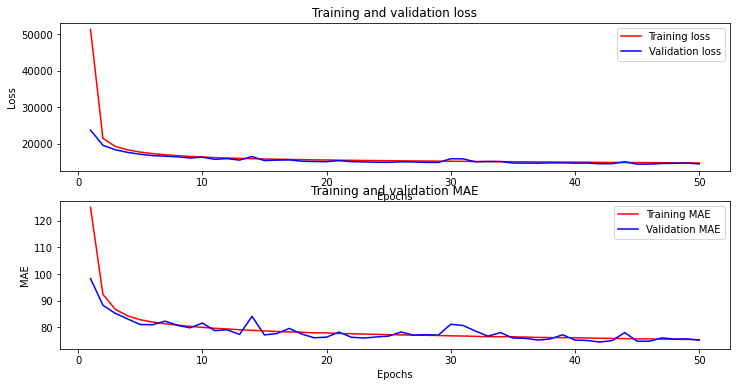

In [30]:
import matplotlib.pyplot as plt

# Obtener la información de la historia del entrenamiento
history_dict = history.history

# Extraer los valores de loss y mae del historial del entrenamiento
loss_values = history_dict['loss']
mae_values = history_dict['mae']
val_loss_values = history_dict['val_loss']
val_mae_values = history_dict['val_mae']
epochs = range(1, len(loss_values) + 1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, mae_values, 'r', label='Training MAE')
plt.plot(epochs, val_mae_values, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

Con estas curvas podemos ver que nuestro modelo no overfitea y que si se agregan más epocas puede ir mejorando algunos segundos más. Pero con este resultado nos alcanza y se puede hacer que mientras vaya obteniendo datos nuevos en tiempo real siga ajustando sus parámetros.

# Análisis de predicciones

seleccionemos una sola vuelta

2/2 [==============================] - 0s 2ms/step


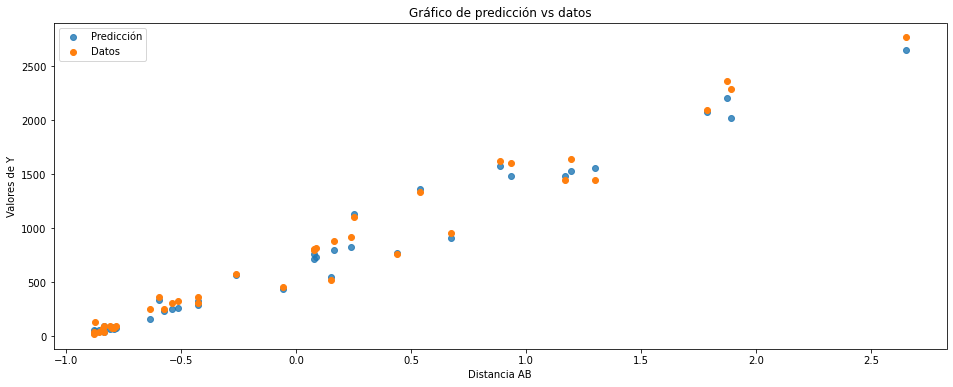

In [43]:
import plotly.graph_objects as go

df_X_test = pd.DataFrame(X_test, columns=df_X.columns)
segundos_dia = df_X_test.iloc[5]['segundos_dia']

X_tmp = df_X_test[df_X_test['segundos_dia'] == segundos_dia]
y_tmp = y_test.iloc[X_tmp.index]

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(16, 6))

y_pred = model.predict(X_tmp)
ax.scatter(X_tmp['distancia_ab'], y_pred, label='Predicción', alpha=0.8)
ax.scatter(X_tmp['distancia_ab'], y_tmp, label='Datos')

# Agregar etiquetas y títulos
ax.set_xlabel('Distancia AB')
ax.set_ylabel('Valores de Y')
ax.set_title('Gráfico de predicción vs datos')

# Mostrar leyenda
ax.legend()

# Mostrar gráfico
plt.show()

Mucho cuidado con la interpretación del gráfico anterior, la distancia en el eje horizontal NO representa la distancia del recorrido, éstas son las distancias que hay entre dos puntos cualquiera del trayecto, por eso no se puede trazar una linea entre ellos, pero además las distancias están estandarizadas.